In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print("Setup Complete")

Setup Complete


In [3]:
# Read the samples and convert to array
sample = 5000
ppg_filepath = "../golden_data/filtered_golden_data.csv"
ppg_data = pd.read_csv(ppg_filepath, nrows=sample)

signal = np.asarray(ppg_data, dtype=np.float64)

print(signal)

[[6.73795545e-02]
 [2.95413484e-01]
 [8.89314559e-01]
 ...
 [1.02712663e+03]
 [1.02970107e+03]
 [1.03238453e+03]]


In [5]:
# Enhance signal

print(signal)

for i in range(len(signal)):
  signal[i] *= signal[i]

print(signal)

[[4.54000437e-03]
 [8.72691266e-02]
 [7.90880384e-01]
 ...
 [1.05498912e+06]
 [1.06028430e+06]
 [1.06581782e+06]]
[[2.06116397e-05]
 [7.61590046e-03]
 [6.25491782e-01]
 ...
 [1.11300205e+12]
 [1.12420280e+12]
 [1.13596762e+12]]


In [86]:
# Choose the Windows Size W1, W2 in TERMA framework
w_cycle =  301  # W1
w_evt = 51  #W2

ma_cycle = np.zeros_like(signal, dtype=np.float64)
ma_evt = np.zeros_like(signal, dtype=np.float64)

mean_signal = 0

# Calculate the Event Duration Moving Average
for i in range((w_evt - 1) // 2, len(signal) - ((w_evt - 1) // 2)):
    for j in range(-(w_evt - 1) // 2, (w_evt - 1) // 2):
        ma_evt[i] += signal[i + j]
    ma_evt[i] /= w_evt

# Calculate the Event Cycle Moving Average
for i in range((w_cycle - 1) // 2, len(signal) - ((w_cycle - 1) // 2)):
    for j in range(-(w_cycle - 1) // 2, (w_cycle - 1) // 2):
        ma_cycle[i] += signal[i + j]
    ma_cycle[i] /= w_cycle

# Calculate the mean of signal
for i in range(len(signal)):
    mean_signal += signal[i]
mean_signal /= len(signal)
mean = np.full(len(signal), mean_signal)

In [87]:
# Calculate the Threshold for detect Block of Interest
beta = 0.8
alpha = np.zeros_like(signal, dtype=np.float64)
threshold_1 = np.zeros_like(signal, dtype=np.float64)
block_of_interest = np.zeros_like(signal, dtype=np.float64)

for i in range(len(signal)):
  threshold_1[i] = ma_cycle[i] + beta*mean[i]

print(threshold_1)

# Generate the Block of Interest
for i in range(len(signal)):
  if ma_evt[i] > threshold_1[i]:
    block_of_interest[i] = 10e+06
  else:
    block_of_interest[i] = 0

[[2132632.51758768]
 [2132632.51758768]
 [2132632.51758768]
 ...
 [2132632.51758768]
 [2132632.51758768]
 [2132632.51758768]]


In [88]:
# Peak detector
start_block = 0
stop_block = 0
peak = 0
peak_index = 0
peak_index_arr = np.zeros_like(signal, dtype=np.float64)
peak_arr = np.zeros_like(signal, dtype=np.float64)
block_num = 0

for i in range(len(block_of_interest) - 1):
  if (block_of_interest[i + 1] - block_of_interest[i]) == 10e+06:
    start_block = i
  if (block_of_interest[i] - block_of_interest[i + 1]) == 10e+06:
    stop_block = i
    if (stop_block - start_block) >= w_evt:
      peak = signal[start_block]
      for i in range(start_block, stop_block + 1):
        if signal[i] > peak:
          peak = signal[i]
          peak_index = i
      peak_arr[block_num] = peak
      peak_index_arr[block_num] = peak_index
      block_num += 1

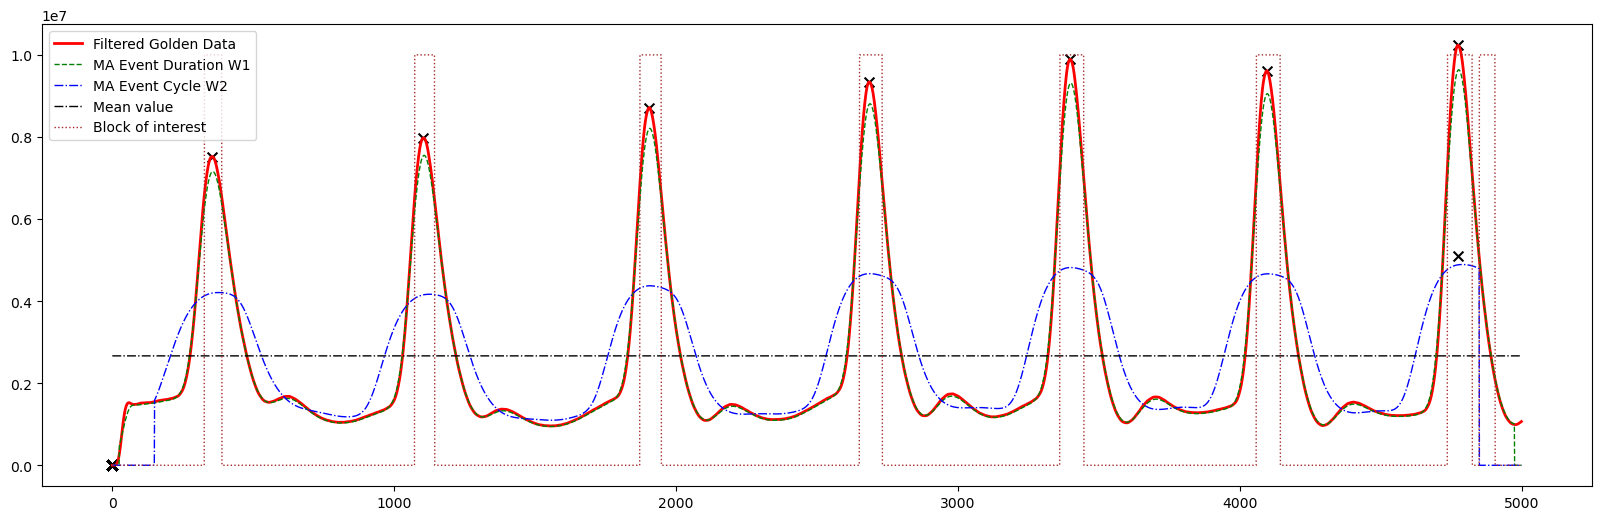

In [89]:
# Hiển thị tín hiệu trước và sau khi lọc
plt.figure(figsize=(20,6))

# sns.lineplot(data=signal, x='Value', y='Samples', linestyle='dashed',color='green', label='Filter Golden Data')

# sns.lineplot(data=ma_evt_duration, linestyle='dashed',color='green', label='MA Event Duration')

# sns.lineplot(data=ma_evt_cycle, linestyle='dotted', color='red', label='MA Event Cycle')

x = np.arange(len(signal))

plt.plot(x, signal, linewidth=2, color='red', label='Filtered Golden Data')
plt.plot(x, ma_evt, linewidth=1, color='green', linestyle='--', label='MA Event Duration W1')
plt.plot(x, ma_cycle, linewidth=1, color='blue', linestyle='-.', label='MA Event Cycle W2')
plt.plot(x, mean, linewidth=1, color='black', linestyle='-.', label='Mean value')
plt.plot(x, block_of_interest, linewidth=1, color='brown', linestyle=':', label='Block of interest')


plt.scatter(peak_index_arr, peak_arr, s = 50, marker='x', c='black')

plt.legend()
plt.show()
